In [1]:
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
import numpy as np
from matplotlib import pyplot as plt

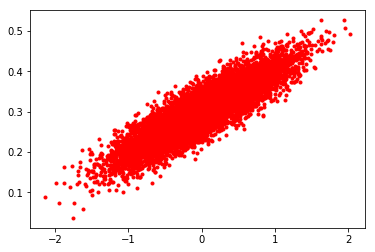

In [2]:
x = np.random.normal(0.0, 0.55, (10000, 1))
y = x * 0.1 + 0.3 + np.random.normal(0.0, 0.03, (10000,1))
                     
plt.plot(x, y, 'r.')
plt.show()

In [3]:
x_data = Variable(torch.Tensor(x))
y_data = Variable(torch.Tensor(y))

In [4]:
# our model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, X):
        X = self.linear(X)
        return X

model = Model()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

Epoch :  1  Loss :  0.2350781


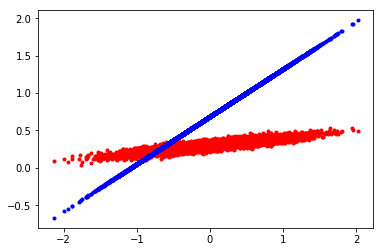

Epoch :  100  Loss :  0.0011041276


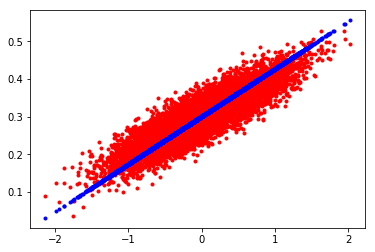

Epoch :  200  Loss :  0.0008996341


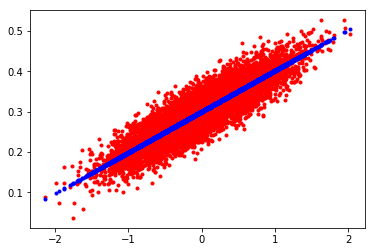

Epoch :  300  Loss :  0.00089918065


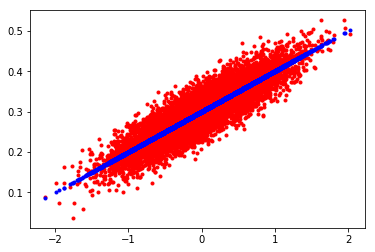

Epoch :  400  Loss :  0.00089917966


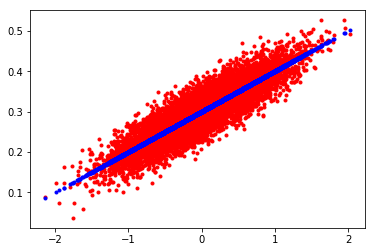

Epoch :  500  Loss :  0.0008991796


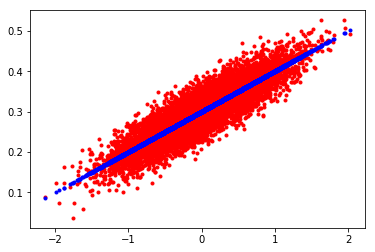

In [5]:
# Training loop
for epoch in range(500):
    y_pred = model.forward(x_data)

    loss = criterion(y_pred, y_data)
    
    if epoch ==0 :
        print("Epoch : ", epoch+1, " Loss : ", loss.data.numpy())
        y_dis = model.forward(x_data).data.numpy()
        plt.plot(x, y, 'r.')
        plt.plot(x, y_dis, 'b.')
        plt.show()
        
    elif (epoch+1) % 100 == 0 :
        print("Epoch : ", epoch+1, " Loss : ", loss.data.numpy())
        y_dis = model.forward(x_data).data.numpy()
        plt.plot(x, y, 'r.')
        plt.plot(x, y_dis, 'b.')
        plt.show()
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [6]:
# After Training, check parameters
param = list(model.parameters())
print(len(param))
print(param[0].data.numpy())
print(param[1].data.numpy())

2
[[0.10014812]]
[0.30044124]
